In [1]:
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
#finds the directory path for the file
dir_path = os.path.dirname(os.path.realpath('.\data\countries-aggregated.csv'))
dir_path
f = []
for (dirpath, dirnames, filenames) in os.walk(dir_path):
    f.extend(filenames)
    break
#Makes a list of all the files with the .csv ending
files=[]
for Type in f:
    if Type.endswith('.csv'):
        files.append(Type)
# Makes a list of all the filenames
dfs_names=[]
for x in files:
    n, q =x.split('.')
    dfs_names.append(n)

# Creats a dictionary with all my .cvs files so that I can analyze it with Pandas
dfs={}
for dfn,file in zip(dfs_names, files):
    #print("./data/" + file)
    print('Loading...',dfn)
    dfs[dfn] = pd.read_csv("./data/" + file, index_col=[0], parse_dates=[1,2,-2,-1])  #index column is the first column, and the 2nd or 3rd (or columns 1, 2) is the date column so we can parse that ahead
print('Finished Loading')

Loading... CA_by_county
Loading... CDC_Cases_and_deaths
Loading... complete_vaccine_rate
Loading... countries-aggregated
Loading... COVID_Varients
Loading... data_county_current
Loading... data_county_timeseries
Loading... DECENNIALPL2020
Loading... key-countries-pivoted
Loading... reference
Loading... States_with_boarders
Loading... state_abriv
Loading... state_neighbors
Loading... time-series-19-covid-combined
Loading... Total_States
Loading... us_confirmed
Loading... us_county_population_data
Loading... us_deaths
Loading... us_simplified
Loading... us_simplified_with_county_data
Loading... vaccine_rate_by_county
Loading... worldwide-aggregate
Finished Loading


In [3]:
us_confirmed = dfs["us_confirmed"].copy()
us_confirmed

,Admin2,Date,Case,Country/Region,Province/State
index,,,,,
0,Autauga,2020-01-22,0,US,Alabama
1,Autauga,2020-01-23,0,US,Alabama
2,Autauga,2020-01-24,0,US,Alabama
3,Autauga,2020-01-25,0,US,Alabama
4,Autauga,2020-01-26,0,US,Alabama
...,...,...,...,...,...
2449681,Weston,2022-01-19,1332,US,Wyoming
2449682,Weston,2022-01-20,1341,US,Wyoming
2449683,Weston,2022-01-21,1349,US,Wyoming


In [4]:
data_county_timeseries = dfs["data_county_timeseries"].copy()
data_county_timeseries

,STATE,COUNTY_NAME,COUNTY,GEOFLAG,DATE,CASE_TYPE,CASES,POPN,WEEK,YEAR
STATE_NAME,,,,,,,,,,
AL,1.0,Autauga,1001,County,2021-12-19,Booster,4791.0,55869.0,50,2021-01-01
AL,1.0,Autauga,1001,County,2021-12-26,Booster,5303.0,55869.0,51,2021-01-01
AL,1.0,Autauga,1001,County,2022-01-02,Booster,5673.0,55869.0,52,2021-01-01
AL,1.0,Autauga,1001,County,2022-01-09,Booster,6139.0,55869.0,1,2022-01-01
AL,1.0,Autauga,1001,County,2022-01-16,Booster,6526.0,55869.0,2,2022-01-01
...,...,...,...,...,...,...,...,...,...,...
VI,78.0,St. Thomas Island,78030,County,2022-04-03,Partial,29350.0,NaN,13,2022-01-01
VI,78.0,St. Thomas Island,78030,County,2022-04-10,Partial,29423.0,NaN,14,2022-01-01
VI,78.0,St. Thomas Island,78030,County,2022-04-17,Partial,29487.0,NaN,15,2022-01-01


## Codebook:
'STATE_NAME': state name as an abbreviation

'STATE': state fips code as integer

'COUNTY_NAME': county name appended with "County" or "Parish"

'COUNTY': 5-digit county fips code as integer

'GEOFLAG': 'County' denotes county level data; 'State' denotes downscaled state data

'DATE': This date is more representative of data updating processes rather than of the vaccination process. It may also not be the same day of the week every week. Thus we recommend using the WEEK and YEAR column for analyses.

'CASE_TYPE': 'Booster' or 'Booster Coverage': protection with an additional dose for compltely protected individuals; 'Complete' or 'Complete Coverage" : complete protection with 2-dose Moderna or Pfizer or 1-dose Janssen; 'Partial' or 'Partial Coverage" : partial protection with 1-dose Moderna or Pfizer

'CASES': counts for CASE_TYPE = Booster or Complete or Partial; percentages of population for CASE_TYPE = Booster Coverage or Complete Coverage or Partial Coverage

'WEEK' = the ISO week of the year the data is for. (The DATE column is a date within this week, but not always the same day of the week. Thus, we recommend use of the WEEK and YEAR column instead of DATE for all analyses.)

'YEAR' = the year that the data corresponds to

'DEMO_GROUP' = racial/ethnic group

In [5]:
# We can look at this data without having to do the summation for each state by day if we get the simplified version of the data
simplified = dfs['us_simplified'].copy() # This data only has the confirmed cases and deaths by state for each date no county data
simplified

,Date,Admin2,Province/State,Confirmed,Deaths,Country/Region
index,,,,,,
0,2020-01-22,Autauga,Alabama,0,0,US
1,2020-01-23,Autauga,Alabama,0,0,US
2,2020-01-24,Autauga,Alabama,0,0,US
3,2020-01-25,Autauga,Alabama,0,0,US
4,2020-01-26,Autauga,Alabama,0,0,US
...,...,...,...,...,...,...
2449681,2022-01-19,Weston,Wyoming,1332,16,US
2449682,2022-01-20,Weston,Wyoming,1341,16,US
2449683,2022-01-21,Weston,Wyoming,1349,16,US


In [6]:
for n in dfs:
    print(n,'\n',dfs[n],'\n')

CA_by_county 
                        Total Cases Total Deaths  2022 Population  \
Alameda County            44597298       558125        1685048.0   
Alpine County                39462            0           1249.0   
Amador County              1790025        22174          40793.0   
Butte County               7457633        94263         185727.0   
Calaveras County           1182736        24947          46526.0   
Colusa County              1101249         6875          21934.0   
Contra Costa County       35420267       364801        1162547.0   
Del Norte County            894503         7493          28028.0   
El Dorado County           5506841        47678         199134.0   
Fresno County             53944857       751903        1020554.0   
Glenn County               1468002         9407          29671.0   
Humboldt County            2549696        26078         133500.0   
Imperial County           15417931       327983         180291.0   
Inyo County                 71416

In [7]:
dfs['reference']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
index,,,,,,,,,,,,
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.949900,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4210,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4211,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4212,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0


I have the longitude and latitude of all of the countries and counties in every country?

In [8]:
reference=dfs['reference']

In [9]:
reference[reference['Admin2']=='San Francisco']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
index,,,,,,,,,,,,
1296,84006075,US,USA,840.0,6075.0,San Francisco,California,US,37.752151,-122.438567,"San Francisco, California, US",881549.0


In [10]:
county_boundries=pd.read_csv('./data/boarders/us-county-boundaries.csv', sep=';')

In [11]:
San_Francisco=county_boundries[county_boundries['NAMELSAD']=='San Francisco County']
San_Francisco

,Geo Point,Geo Shape,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,STUSAB,LSAD,...,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,STATE_NAME,COUNTYFP NOZERO
1188,"37.7597150131,-122.693975573","{""coordinates"": [[[[-122.612285, 37.815224], [...",6,75,277302,6075,San Francisco,San Francisco County,CA,6,...,488.0,41860.0,41884.0,C,121477743,479114582,37.727239,-123.032229,California,75


Long and Lat look the same.  the only benifit I get from this data is the "Geo Shape"

Okay.  There are two things in this.  "Coordinates" and "type"

In [12]:
reference[reference['Admin2']=='Alameda']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
index,,,,,,,,,,,,
1259,84006001,US,USA,840.0,6001.0,Alameda,California,US,37.646294,-121.892927,"Alameda, California, US",1671329.0


In [13]:
Ca_by_county=dfs["CA_by_county"]
Ca_by_county.head(1)

,Total Cases,Total Deaths,2022 Population,Growth Since 2010,Density (mi²),Cases per 1K pop,Deaths per 1K pop,Cases by Density (mi²)
Alameda County,44597298,558125,1685048.0,11.37%,2279.89,0.026466,0.0003312220186012,19561.162161332348


In [14]:
data_county_timeseries[data_county_timeseries['COUNTY_NAME']=='Alameda'].head(1)

,STATE,COUNTY_NAME,COUNTY,GEOFLAG,DATE,CASE_TYPE,CASES,POPN,WEEK,YEAR
STATE_NAME,,,,,,,,,,
CA,6.0,Alameda,6001,County,2021-08-17,Booster,1052.0,1671329.0,33,2021-01-01


Looks like the reference population and county_timeseries data are a little behind.  They look like they have from 2018 population data.

In [15]:
# Unaassigned data is the same Admin2 name in each state.  I need to rename that data or create a combined key so they don't get grouped by accident.
simplified['Combined_Key']=simplified['Admin2'] + ', ' + simplified['Province/State'] + ', ' + simplified['Country/Region']

In [16]:
simplified

,Date,Admin2,Province/State,Confirmed,Deaths,Country/Region,Combined_Key
index,,,,,,,
0,2020-01-22,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
1,2020-01-23,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
2,2020-01-24,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
3,2020-01-25,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
4,2020-01-26,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
...,...,...,...,...,...,...,...
2449681,2022-01-19,Weston,Wyoming,1332,16,US,"Weston, Wyoming, US"
2449682,2022-01-20,Weston,Wyoming,1341,16,US,"Weston, Wyoming, US"
2449683,2022-01-21,Weston,Wyoming,1349,16,US,"Weston, Wyoming, US"


In [17]:
# Lets import the longitude and latitude data from reference into our predictive algorithm so we can have some geopositional data
Total_simplified=simplified.groupby('Combined_Key').sum()
Total_simplified

,Confirmed
Combined_Key,
"Abbeville, South Carolina, US",1269897
"Acadia, Louisiana, US",3756298
"Accomack, Virginia, US",1547387
"Ada, Idaho, US",27014209
"Adair, Iowa, US",400574
...,...
"Yuma, Arizona, US",17806522
"Yuma, Colorado, US",429753
"Zapata, Texas, US",904772


In [18]:
# for some reason there was a tab or some other non visible character in the Combined_Key column so I had to redo it.
reference['Combined_Key']= reference['Admin2'] + ', ' + reference['Province_State'] + ', ' + reference['Country_Region']

In [19]:
County_Locations=reference[['Combined_Key','Lat','Long_']].groupby('Combined_Key').sum()
County_Locations

,Lat,Long_
Combined_Key,,
"Abbeville, South Carolina, US",34.223334,-82.461707
"Acadia, Louisiana, US",30.295065,-92.414197
"Accomack, Virginia, US",37.767072,-75.632346
"Ada, Idaho, US",43.452658,-116.241552
"Adair, Iowa, US",41.330756,-94.471059
...,...,...
"Yuma, Arizona, US",32.768957,-113.906667
"Yuma, Colorado, US",40.003468,-102.425867
"Zapata, Texas, US",27.001564,-99.169872


In [20]:
US_Counties=pd.merge(Total_simplified, County_Locations, left_index=True, right_index=True, how='left')
US_Counties

,Confirmed,Lat,Long_
Combined_Key,,,
"Abbeville, South Carolina, US",1269897,34.223334,-82.461707
"Acadia, Louisiana, US",3756298,30.295065,-92.414197
"Accomack, Virginia, US",1547387,37.767072,-75.632346
"Ada, Idaho, US",27014209,43.452658,-116.241552
"Adair, Iowa, US",400574,41.330756,-94.471059
...,...,...,...
"Yuma, Arizona, US",17806522,32.768957,-113.906667
"Yuma, Colorado, US",429753,40.003468,-102.425867
"Zapata, Texas, US",904772,27.001564,-99.169872


In [283]:
# Data from 2020 US Census from data.census.gov
us_county_population_data=pd.read_csv('./data/DECENNIALPL2020.csv')
us_county_population_data

,GEO_ID,NAME,P1_001N,P1_002N,P1_003N,P1_004N,P1_005N,P1_006N,P1_007N,P1_008N,...,P1_062N,P1_063N,P1_064N,P1_065N,P1_066N,P1_067N,P1_068N,P1_069N,P1_070N,P1_071N
0,id,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or A...,!!Total:!!Population of one race:!!American I...,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Haw...,!!Total:!!Population of one race:!!Some Other...,...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...
1,0500000US01001,"Autauga County, Alabama",58805,55648,42160,11445,217,881,35,910,...,0,2,2,0,0,0,0,0,0,0
2,0500000US01003,"Baldwin County, Alabama",231767,216743,189399,18217,1582,2067,143,5335,...,0,0,0,0,0,0,0,0,0,0
3,0500000US01005,"Barbour County, Alabama",25223,24523,11317,11933,116,117,1,1039,...,0,2,2,0,0,0,0,0,0,0
4,0500000US01007,"Bibb County, Alabama",22293,21534,16555,4413,60,32,9,465,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,0500000US72145,"Vega Baja Municipio, Puerto Rico",54414,27813,10042,3491,460,28,9,13783,...,0,7,0,7,0,0,0,0,0,0
3218,0500000US72147,"Vieques Municipio, Puerto Rico",8249,6127,1551,1256,86,7,1,3226,...,0,0,0,0,0,0,0,0,0,0
3219,0500000US72149,"Villalba Municipio, Puerto Rico",22093,11151,3429,1380,130,10,0,6202,...,0,0,0,0,0,0,0,0,0,0
3220,0500000US72151,"Yabucoa Municipio, Puerto Rico",30426,19720,5028,2941,199,8,7,11537,...,0,0,0,0,0,0,0,0,0,0


Looks like row 0 is the meta data for this.  Also this data doens't have the US key added to the end.

In [284]:
# There was an issue with some capitalizations of the word city
us_county_population_data['NAME']=us_county_population_data['NAME'].str.title()

In [285]:
us_county_population_data['Combined_Key']=us_county_population_data['NAME']+ ', US'
us_county_population_data

,GEO_ID,NAME,P1_001N,P1_002N,P1_003N,P1_004N,P1_005N,P1_006N,P1_007N,P1_008N,...,P1_063N,P1_064N,P1_065N,P1_066N,P1_067N,P1_068N,P1_069N,P1_070N,P1_071N,Combined_Key
0,id,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or A...,!!Total:!!Population of one race:!!American I...,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Haw...,!!Total:!!Population of one race:!!Some Other...,...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,"Geographic Area Name, US"
1,0500000US01001,"Autauga County, Alabama",58805,55648,42160,11445,217,881,35,910,...,2,2,0,0,0,0,0,0,0,"Autauga County, Alabama, US"
2,0500000US01003,"Baldwin County, Alabama",231767,216743,189399,18217,1582,2067,143,5335,...,0,0,0,0,0,0,0,0,0,"Baldwin County, Alabama, US"
3,0500000US01005,"Barbour County, Alabama",25223,24523,11317,11933,116,117,1,1039,...,2,2,0,0,0,0,0,0,0,"Barbour County, Alabama, US"
4,0500000US01007,"Bibb County, Alabama",22293,21534,16555,4413,60,32,9,465,...,0,0,0,0,0,0,0,0,0,"Bibb County, Alabama, US"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,0500000US72145,"Vega Baja Municipio, Puerto Rico",54414,27813,10042,3491,460,28,9,13783,...,7,0,7,0,0,0,0,0,0,"Vega Baja Municipio, Puerto Rico, US"
3218,0500000US72147,"Vieques Municipio, Puerto Rico",8249,6127,1551,1256,86,7,1,3226,...,0,0,0,0,0,0,0,0,0,"Vieques Municipio, Puerto Rico, US"
3219,0500000US72149,"Villalba Municipio, Puerto Rico",22093,11151,3429,1380,130,10,0,6202,...,0,0,0,0,0,0,0,0,0,"Villalba Municipio, Puerto Rico, US"
3220,0500000US72151,"Yabucoa Municipio, Puerto Rico",30426,19720,5028,2941,199,8,7,11537,...,0,0,0,0,0,0,0,0,0,"Yabucoa Municipio, Puerto Rico, US"


In [286]:
us_county_population_data.drop(0, inplace=True)

In [287]:
us_county_population_data.rename(columns={'P1_001N':'Total_Pop'}, inplace=True)

In [288]:
County_Pop=us_county_population_data[['Combined_Key','Total_Pop']]
County_Pop

,Combined_Key,Total_Pop
1,"Autauga County, Alabama, US",58805
2,"Baldwin County, Alabama, US",231767
3,"Barbour County, Alabama, US",25223
4,"Bibb County, Alabama, US",22293
5,"Blount County, Alabama, US",59134
...,...,...
3217,"Vega Baja Municipio, Puerto Rico, US",54414
3218,"Vieques Municipio, Puerto Rico, US",8249
3219,"Villalba Municipio, Puerto Rico, US",22093
3220,"Yabucoa Municipio, Puerto Rico, US",30426


Well I now have the issue that the combined key properly calls out Municipios counties and burroghs correctly, which is information not in the other data.

So I'm going to delete that info from the combined key so I can merge the data

In [289]:
County_Pop['Combined_Key'].replace(' City And County','', regex=True, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_36084\3323201992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  County_Pop['Combined_Key'].replace(' City And County','', regex=True, inplace=True)


In [290]:
County_Pop['Combined_Key'].replace(' City And Borough','', regex=True, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_36084\4015191840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  County_Pop['Combined_Key'].replace(' City And Borough','', regex=True, inplace=True)


In [291]:
# County_Pop['Combined_Key'].replace(' City','', regex=True, inplace=True)

In [292]:
County_Pop['Combined_Key'].replace(' County','', regex=True, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_36084\115391863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  County_Pop['Combined_Key'].replace(' County','', regex=True, inplace=True)


In [293]:
County_Pop['Combined_Key'].replace(' Municipio','', regex=True, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_36084\328253180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  County_Pop['Combined_Key'].replace(' Municipio','', regex=True, inplace=True)


In [294]:
County_Pop['Combined_Key'].replace(' Borough','', regex=True, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_36084\3673278707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  County_Pop['Combined_Key'].replace(' Borough','', regex=True, inplace=True)


In [295]:
County_Pop['Combined_Key'].replace(' Parish','', regex=True, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_36084\2293417644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  County_Pop['Combined_Key'].replace(' Parish','', regex=True, inplace=True)


In [296]:
County_Pop.set_index('Combined_Key', inplace=True)

Apparently Louisiana has perishes instead of counties and Alaska has bouroughs where RI and CT don't have anything

In [297]:
Total_US_Counties=pd.merge(US_Counties, County_Pop, left_index=True, right_index=True, how='left')

In [298]:
pd.set_option('display.max_rows', 10)
Total_US_Counties

,Confirmed,Lat,Long_,Total_Pop
Combined_Key,,,,
"Abbeville, South Carolina, US",1269897,34.223334,-82.461707,24295
"Acadia, Louisiana, US",3756298,30.295065,-92.414197,57576
"Accomack, Virginia, US",1547387,37.767072,-75.632346,33413
"Ada, Idaho, US",27014209,43.452658,-116.241552,494967
"Adair, Iowa, US",400574,41.330756,-94.471059,7496
...,...,...,...,...
"Yuma, Arizona, US",17806522,32.768957,-113.906667,203881
"Yuma, Colorado, US",429753,40.003468,-102.425867,9988
"Zapata, Texas, US",904772,27.001564,-99.169872,13889


In [299]:
Total_US_Counties.isna().sum()

Confirmed      0
Lat            1
Long_          1
Total_Pop    238
dtype: int64

In [300]:
Total_US_Counties[Total_US_Counties['Lat'].isna()]

,Confirmed,Lat,Long_,Total_Pop
Combined_Key,,,,
"Yakutat, Alaska, US",60109,NaN,NaN,662


Looks like the CDC is missing some data

In [301]:
Total_US_Counties=Total_US_Counties.reset_index()

In [302]:
Admin2 =Total_US_Counties['Combined_Key'].str.split(',')

In [303]:
Admin2

0       [Abbeville,  South Carolina,  US]
1               [Acadia,  Louisiana,  US]
2              [Accomack,  Virginia,  US]
3                      [Ada,  Idaho,  US]
4                     [Adair,  Iowa,  US]
                      ...                
3331                [Yuma,  Arizona,  US]
3332               [Yuma,  Colorado,  US]
3333                [Zapata,  Texas,  US]
3334                [Zavala,  Texas,  US]
3335        [Ziebach,  South Dakota,  US]
Name: Combined_Key, Length: 3336, dtype: object

In [304]:
Total_US_Counties['Combined_Key']=Admin2

In [305]:
Total_US_Counties

,Combined_Key,Confirmed,Lat,Long_,Total_Pop
0,"[Abbeville, South Carolina, US]",1269897,34.223334,-82.461707,24295
1,"[Acadia, Louisiana, US]",3756298,30.295065,-92.414197,57576
2,"[Accomack, Virginia, US]",1547387,37.767072,-75.632346,33413
3,"[Ada, Idaho, US]",27014209,43.452658,-116.241552,494967
4,"[Adair, Iowa, US]",400574,41.330756,-94.471059,7496
...,...,...,...,...,...
3331,"[Yuma, Arizona, US]",17806522,32.768957,-113.906667,203881
3332,"[Yuma, Colorado, US]",429753,40.003468,-102.425867,9988
3333,"[Zapata, Texas, US]",904772,27.001564,-99.169872,13889
3334,"[Zavala, Texas, US]",930381,28.866172,-99.760508,9670


In [306]:
admin2=[]
state2=[]
country2=[]
for n in Total_US_Counties['Combined_Key']:
    admin2.append(n[0])
    state2.append(n[1])
    country2.append(n[2])

In [307]:
Total_US_Counties['Admin2']=admin2
Total_US_Counties['Province/State']=state2

In [308]:
Total_US_Counties.drop('Combined_Key', axis=1, inplace=True)

In [309]:
Total_US_Counties.groupby(['Province/State','Admin2']).sum()

Confirmed        Lat       Long_
Province/State Admin2                                      
 Alabama       Autauga       3523337  32.539527  -86.644082
               Baldwin      11905296  30.727750  -87.722071
               Barbour       1261086  31.868263  -85.387129
               Bibb          1410004  32.996421  -87.125115
               Blount        3484256  33.982109  -86.567906
...                              ...        ...         ...
 Wyoming       Teton         1830091  43.935225 -110.589080
               Uinta         1202016  41.287818 -110.547578
               Unassigned        420   0.000000    0.000000
               Washakie       502625  43.904516 -107.680187
               Weston         342738  43.839612 -104.567488

[3336 rows x 3 columns]

In [310]:
# And now I've put everything back and have the population data as well as locations of almost all of them.

In [311]:
Total_US_Counties.dtypes

Confirmed           int64
Lat               float64
Long_             float64
Total_Pop          object
Admin2             object
Province/State     object
dtype: object

In [312]:
Total_US_Counties[Total_US_Counties['Lat'].isna()]

,Confirmed,Lat,Long_,Total_Pop,Admin2,Province/State
3309,60109,NaN,NaN,662,Yakutat,Alaska


Yakutat Alaska is located at 59.5469° N, 139.7272° W

In [313]:
Total_US_Counties['Lat'].fillna(59.5469, inplace=True)
Total_US_Counties['Long_'].fillna(-139.7272, inplace=True)

In [314]:
Total_US_Counties.isna().sum()

Confirmed           0
Lat                 0
Long_               0
Total_Pop         238
Admin2              0
Province/State      0
dtype: int64

In [354]:
# now I need to deal with the counties which don't have populations
pd.set_option('display.max_rows', None)
Total_US_Counties[Total_US_Counties['Total_Pop'].isna()].sort_values(['Province/State', 'Admin2'])

,Confirmed,Lat,Long_,Total_Pop,Admin2,Province/State
768,4607482,34.459469,-85.807829,NaN,DeKalb,Alabama
2238,0,0.000000,0.000000,NaN,Out of AL,Alabama
2983,0,0.000000,0.000000,NaN,Unassigned,Alabama
38,307219,52.323300,-174.159600,NaN,Aleutians West,Alaska
64,16962552,61.149982,-149.142699,NaN,Anchorage,Alaska
211,1897884,60.909805,-159.856183,NaN,Bethel,Alaska
283,134769,58.624033,-156.214059,NaN,Bristol Bay plus Lake and Peninsula,Alaska
530,279690,61.166660,-149.900000,NaN,Chugach,Alaska
663,155107,60.388600,-162.890520,NaN,Copper River,Alaska
814,183325,59.796037,-158.238194,NaN,Dillingham,Alaska


These counties must have populations.  I should probably set them to the mean population for that state.

Interesting... These are independant cities in Virginia. They don't belong to a county.

In [349]:
# Wikipedia list of the Virginia counties
pd.read_html('https://en.wikipedia.org/wiki/List_of_cities_and_counties_in_Virginia')[2]

,County,FIPS code[4],County seat[5][6],Est.[5],Origin,Etymology,Population[7],Area[5],Map
0,Accomack County,1,Accomac,1663,Accomac Shire was established in 1634 as one o...,"From the Native American word Accawmack, meani...",33246,"455 sq mi(1,178 km2)",NaN
1,Albemarle County,3,Charlottesville,1744,"In 1744, the Virginia General Assembly created...","Willem Anne van Keppel, 2nd Earl of Albemarle,...",113535,"723 sq mi(1,873 km2)",NaN
2,Alleghany County,5,Covington,1822,Formed from parts of Bath and Botetourt counti...,Alleghany Mountains,14986,"446 sq mi(1,155 km2)",NaN
3,Amelia County,7,Amelia,1735,Formed from Brunswick and Prince George counties,"Princess Amelia Sophia, second daughter of Geo...",13268,357 sq mi(925 km2),NaN
4,Amherst County,9,Amherst,1761,From Albemarle county,"Jeffery Amherst, British conqueror of Quebec d...",31273,"475 sq mi(1,230 km2)",NaN
5,Appomattox County,11,Appomattox,1845,"From Buckingham, Campbell, Charlotte and Princ...",Appomattox River,16353,334 sq mi(865 km2),NaN
6,Arlington County,13,Arlington,1846,"Annexed from the District of Columbia, having ...","Arlington House, The Robert E. Lee Memorial, o...",232965,26 sq mi(67 km2),NaN
7,Augusta County,15,Staunton,1738,From Orange County,"Augusta of Saxe-Gotha, the Princess of Wales",77563,"971 sq mi(2,515 km2)",NaN
8,Bath County,17,Warm Springs,1791,"From Augusta, Botetourt and Greenbrier countie...","Bath, England",4114,"532 sq mi(1,378 km2)",NaN
9,Bedford County,19,Bedford,1754,From Lunenburg county,"John Russell, 4th Duke of Bedford, British pol...",80131,"755 sq mi(1,955 km2)",NaN


In [351]:
# Wikipedia list of the Virginia independant cities
virginia_independants=pd.read_html('https://en.wikipedia.org/wiki/List_of_cities_and_counties_in_Virginia')[3]
virginia_independants

,City,FIPS code[4],Seat[5],Est.[5],Origin,Etymology,Population[10],Area[5],Map
0,Alexandria,510,NaN,1870[11],From Alexandria County[12],"Phillip & John Alexander, brothers and area pl...",154706,15 sq mi(39 km2),NaN
1,Bristol,520,NaN,1890[12],From Washington County[12],"Bristol, England",17054,12 sq mi(31 km2),NaN
2,Buena Vista,530,NaN,1892[12],From Rockbridge County[12],"from the Buena Vista Company, which founded an...",6601,7 sq mi(18 km2),NaN
3,Charlottesville,540,NaN,1888[12],From Albemarle County[12],"Charlotte of Mecklenburg-Strelitz, wife of Kin...",45672,10 sq mi(26 km2),NaN
4,Chesapeake,550,NaN,1963,Formed out of consolidation of Norfolk County ...,Chesapeake tribe,251269,341 sq mi(883 km2),NaN
5,Colonial Heights,570,NaN,1948,From Chesterfield County,From the actions of Revolutionary War general ...,18273,8 sq mi(21 km2),NaN
6,Covington,580,NaN,1952,From Alleghany County,"Leonard Covington, hero of the Siege of Fort R...",5717,4 sq mi(10 km2),NaN
7,Danville,590,NaN,1870[12],From Pittsylvania County[12],Dan River,42215,43 sq mi(111 km2),NaN
8,Emporia,595,NaN,1967,From Greensville County,"Emporia, Kansas",5667,7 sq mi(18 km2),NaN
9,Fairfax,600,NaN,1961,From Fairfax County,"Thomas Fairfax, 6th Lord Fairfax of Cameron, o...",24276,6 sq mi(16 km2),NaN


Wikipedia appears to update their population data from the 2021 census data

So here is the question... Do I keep the data or remove it because it isn't based on the county?

In [353]:
# Wikipedia list of the Puerto Rico Municipalities
Puerto_Rico=pd.read_html('https://en.wikipedia.org/wiki/Municipalities_of_Puerto_Rico')[1]
Puerto_Rico

,Name,Title,FIPS code[14],Population (2020)[3],Population (2010)[15],Area[16],Founded
0,Adjuntas,Town,1,18020,19483,66.69 sq mi (172.73 sq km),1815
1,Aguada,Town,3,38136,41959,30.85 sq mi (79.90 sq km),1639
2,Aguadilla,City,5,55101,60949,36.53 sq mi (94.61 sq km),1775
3,Aguas Buenas,Town,7,24223,28659,30.08 sq mi (77.92 sq km),1838
4,Aibonito,Town,9,24637,25900,31.31 sq mi (81.10 sq km),1824
5,Añasco,Town,11,25596,29261,39.29 sq mi (101.75 sq km),1733
6,Arecibo,City,13,87754,96440,125.95 sq mi (326.20 sq km),1616
7,Arroyo,Town,15,15843,19575,15.01 sq mi (38.87 sq km),1855
8,Barceloneta,Town,17,22657,24816,18.69 sq mi (48.41 sq km),1881
9,Barranquitas,Town,19,28983,30318,34.25 sq mi (88.71 sq km),1803


In [316]:
pd.set_option('display.max_rows', 10)
data_county_timeseries[data_county_timeseries['COUNTY_NAME'].str.contains('City')]

,STATE,COUNTY_NAME,COUNTY,GEOFLAG,DATE,CASE_TYPE,CASES,POPN,WEEK,YEAR
STATE_NAME,,,,,,,,,,
AK,2.0,Juneau City and Borough,2110,County,2021-12-19,Booster,9421.000000,31974.0,50,2021-01-01
AK,2.0,Juneau City and Borough,2110,County,2021-12-26,Booster,9798.000000,31974.0,51,2021-01-01
AK,2.0,Juneau City and Borough,2110,County,2022-01-02,Booster,10256.000000,31974.0,52,2021-01-01
AK,2.0,Juneau City and Borough,2110,County,2022-01-09,Booster,10644.000000,31974.0,1,2022-01-01
AK,2.0,Juneau City and Borough,2110,County,2022-01-16,Booster,11000.000000,31974.0,2,2022-01-01
...,...,...,...,...,...,...,...,...,...,...
VA,51.0,Roanoke City,51770,County,2022-04-03,Partial Coverage,63.884490,99143.0,13,2022-01-01
VA,51.0,Roanoke City,51770,County,2022-04-10,Partial Coverage,63.979303,99143.0,14,2022-01-01
VA,51.0,Roanoke City,51770,County,2022-04-16,Partial Coverage,64.062011,99143.0,15,2022-01-01


In [ ]:
# I have some counties named City and County and others City and Borough.  I'll have to edit that out...  Also some called City others city

In [ ]:
# Looks like I'm missing some of the updated population data for some counties.  At least I have the 2018 population data, but that isn't good enough

In [322]:
df=Total_US_Counties.copy()
df

,Confirmed,Lat,Long_,Total_Pop,Admin2,Province/State
0,1269897,34.223334,-82.461707,24295.0,Abbeville,South Carolina
1,3756298,30.295065,-92.414197,57576.0,Acadia,Louisiana
2,1547387,37.767072,-75.632346,33413.0,Accomack,Virginia
3,27014209,43.452658,-116.241552,494967.0,Ada,Idaho
4,400574,41.330756,-94.471059,7496.0,Adair,Iowa
...,...,...,...,...,...,...
3331,17806522,32.768957,-113.906667,203881.0,Yuma,Arizona
3332,429753,40.003468,-102.425867,9988.0,Yuma,Colorado
3333,904772,27.001564,-99.169872,13889.0,Zapata,Texas
3334,930381,28.866172,-99.760508,9670.0,Zavala,Texas


In [323]:
# One quick way to deal with this is to make the population of these the mean population of that state
df["Total_Pop"] = df.groupby("Province/State")["Total_Pop"].transform(lambda x: x.fillna(x.mean()))

In [334]:
df.isna().sum()

Confirmed         0
Lat               0
Long_             0
Total_Pop         3
Admin2            0
Province/State    0
dtype: int64

In [335]:
df[df['Total_Pop'].isna()]

,Confirmed,Lat,Long_,Total_Pop,Admin2,Province/State
818,25268132,38.904178,-77.01656,NaN,District of Columbia,District of Columbia
2244,0,0.000000,0.00000,NaN,Out of DC,District of Columbia
2991,0,0.000000,0.00000,NaN,Unassigned,District of Columbia


In [341]:
df.fillna(718355, inplace=True) # Population of Washington DC is 718,355
df[df['Total_Pop'].isna()]

,Confirmed,Lat,Long_,Total_Pop,Admin2,Province/State


In [355]:
#That seems to have worked, but I think I can do better

In [343]:
df.to_csv('./data/us_simplified_with_county_data.csv')

In [356]:
missing=Total_US_Counties[Total_US_Counties['Total_Pop'].isna()].sort_values(['Province/State', 'Admin2'])
missing['Province/State'].unique()

array([' Alabama', ' Alaska', ' Arizona', ' Arkansas', ' California',
       ' Colorado', ' Connecticut', ' Delaware', ' District of Columbia',
       ' Florida', ' Georgia', ' Hawaii', ' Idaho', ' Illinois',
       ' Indiana', ' Iowa', ' Kansas', ' Kentucky', ' Louisiana',
       ' Maine', ' Maryland', ' Massachusetts', ' Michigan', ' Minnesota',
       ' Mississippi', ' Missouri', ' Montana', ' Nebraska', ' Nevada',
       ' New Hampshire', ' New Jersey', ' New Mexico', ' New York',
       ' North Carolina', ' North Dakota', ' Ohio', ' Oklahoma',
       ' Oregon', ' Pennsylvania', ' Puerto Rico', ' Rhode Island',
       ' South Carolina', ' South Dakota', ' Tennessee', ' Texas',
       ' Utah', ' Vermont', ' Virginia', ' Washington', ' West Virginia',
       ' Wisconsin', ' Wyoming'], dtype=object)

In [367]:
# Lets drop the Out of... and unassigned values and "out of" rows first
missing.drop(missing[missing['Admin2']=='Unassigned'].index,inplace=True)
missing.drop(missing[missing['Admin2'].str.contains('Out of')].index,inplace=True)

In [369]:
pd.set_option('display.max_rows', 10)

missing

,Confirmed,Lat,Long_,Total_Pop,Admin2,Province/State
768,4607482,34.459469,-85.807829,NaN,DeKalb,Alabama
38,307219,52.323300,-174.159600,NaN,Aleutians West,Alaska
64,16962552,61.149982,-149.142699,NaN,Anchorage,Alaska
211,1897884,60.909805,-159.856183,NaN,Bethel,Alaska
283,134769,58.624033,-156.214059,NaN,Bristol Bay plus Lake and Peninsula,Alaska
...,...,...,...,...,...,...
3195,1144436,38.064515,-78.902939,NaN,Waynesboro,Virginia
3255,374776,37.281313,-76.709051,NaN,Williamsburg,Virginia
3263,1360734,39.170545,-78.173251,NaN,Winchester,Virginia
1910,841955,37.380029,-81.650837,NaN,McDowell,West Virginia


In [389]:
# Now lets see what we are missing
missing['Province/State'].unique()

array([' Alabama', ' Alaska', ' District of Columbia', ' Florida',
       ' Georgia', ' Illinois', ' Indiana', ' Kansas', ' Kentucky',
       ' Louisiana', ' Maryland', ' Massachusetts', ' Michigan',
       ' Minnesota', ' Mississippi', ' Missouri', ' Montana', ' Nebraska',
       ' New Mexico', ' North Carolina', ' North Dakota', ' Oklahoma',
       ' Pennsylvania', ' Puerto Rico', ' South Carolina',
       ' South Dakota', ' Tennessee', ' Texas', ' Utah', ' Virginia',
       ' West Virginia', ' Wisconsin'], dtype=object)

In [377]:
# I'm going to start with Virginia and Puerto Rico
virginia_independants.rename(columns={'City':'Admin2','Population[10]':'Total_Pop'}, inplace=True)
virginia_independants['Province/State']='Virginia'
virginia_independants[['Province/State','Admin2','Total_Pop']]

,Province/State,Admin2,Total_Pop
0,Virginia,Alexandria,154706
1,Virginia,Bristol,17054
2,Virginia,Buena Vista,6601
3,Virginia,Charlottesville,45672
4,Virginia,Chesapeake,251269
...,...,...,...
33,Virginia,Suffolk,96194
34,Virginia,Virginia Beach,457672
35,Virginia,Waynesboro,22550
36,Virginia,Williamsburg,15590


In [378]:
Puerto_Rico.rename(columns={'Name':'Admin2','Population (2020)[3]':'Total_Pop'}, inplace=True)
Puerto_Rico['Province/State']='Puerto Rico'
Puerto_Rico[['Province/State','Admin2','Total_Pop']]

,Province/State,Admin2,Total_Pop
0,Puerto Rico,Adjuntas,18020
1,Puerto Rico,Aguada,38136
2,Puerto Rico,Aguadilla,55101
3,Puerto Rico,Aguas Buenas,24223
4,Puerto Rico,Aibonito,24637
...,...,...,...
73,Puerto Rico,Vega Baja,54414
74,Puerto Rico,Vieques,8249
75,Puerto Rico,Villalba,22093
76,Puerto Rico,Yabucoa,30412


In [380]:
independants=virginia_independants[['Province/State','Admin2','Total_Pop']].append(Puerto_Rico[['Province/State','Admin2','Total_Pop']])
independants

C:\Users\User\AppData\Local\Temp\ipykernel_36084\2157565316.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  independants=virginia_independants[['Province/State','Admin2','Total_Pop']].append(Puerto_Rico[['Province/State','Admin2','Total_Pop']])


,Province/State,Admin2,Total_Pop
0,Virginia,Alexandria,154706
1,Virginia,Bristol,17054
2,Virginia,Buena Vista,6601
3,Virginia,Charlottesville,45672
4,Virginia,Chesapeake,251269
...,...,...,...
73,Puerto Rico,Vega Baja,54414
74,Puerto Rico,Vieques,8249
75,Puerto Rico,Villalba,22093
76,Puerto Rico,Yabucoa,30412


In [410]:
pd.set_option('display.max_rows', None)
pd.merge(missing, independants, left_on=['Province/State','Admin2'], right_on=['Province/State','Admin2'], how='left').sort_values('Admin2')

,Confirmed,Lat,Long_,Total_Pop_x,Admin2,Province/State,Total_Pop_y
1,307219,52.323300,-174.159600,NaN,Aleutians West,Alaska,NaN
96,5865837,38.814003,-77.081831,NaN,Alexandria,Virginia,NaN
64,415971,18.287985,-67.120611,NaN,Anasco,Puerto Rico,NaN
2,16962552,61.149982,-149.142699,NaN,Anchorage,Alaska,NaN
65,4914514,18.349460,-66.168435,NaN,Bayamon,Puerto Rico,NaN
90,10827535,41.521068,-113.083282,NaN,Bear River,Utah,NaN
3,1897884,60.909805,-159.856183,NaN,Bethel,Alaska,NaN
97,743863,36.616302,-82.163591,NaN,Bristol,Virginia,NaN
4,134769,58.624033,-156.214059,NaN,Bristol Bay plus Lake and Peninsula,Alaska,NaN
98,431422,37.734846,-79.352961,NaN,Buena Vista,Virginia,NaN


## Prediction by county

In [99]:
from sklearn.model_selection import train_test_split 
X=df.drop('Deaths',axis=1).reset_index()
y=df.reset_index().Deaths

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42) # random_state used for reproducibility
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(2502, 7) (834, 7)
(2502,) (834,)


In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3=df.copy()
cat_columns = df.select_dtypes(['object']).columns
for n in cat_columns:
    le.fit(df3[n])
    df3[n]=le.transform(df3[n])

In [122]:
X=df3.drop('Deaths',axis=1)
y=df3.Deaths

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42) # random_state used for reproducibility
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(2502, 6) (834, 6)
(2502,) (834,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


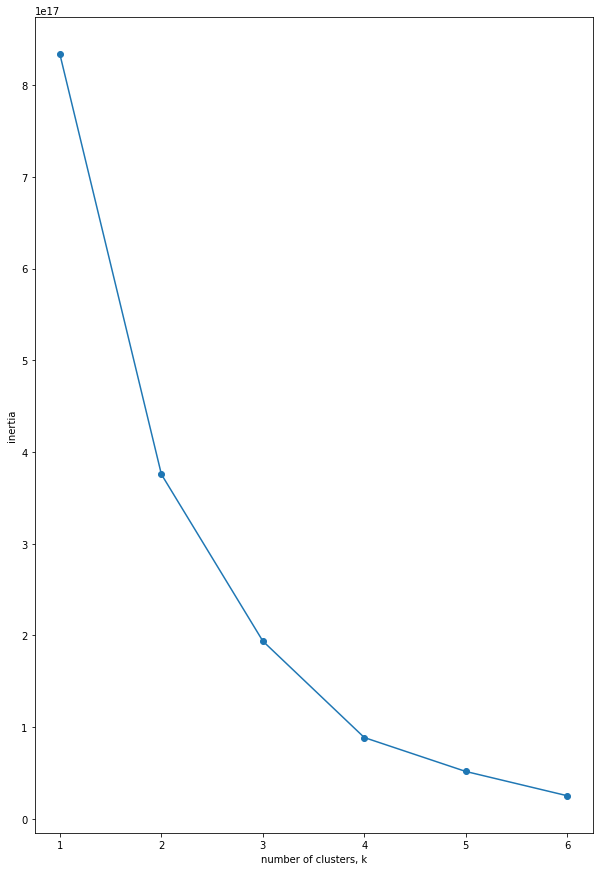

In [123]:
# Import KMeans to start, I'll try KNN afterwards
from sklearn.cluster import KMeans

ks = range(1, 7)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model =KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_train)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(10,15))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [162]:
 # Create a KMeans instance with k clusters: model
model =KMeans(n_clusters=2)

# Fit model to samples
model.fit(X_train)
model.score(X_test)

-6.633289538223155e+17

In [163]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [164]:
model.predict(X_train)

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [165]:
knn=X_train.copy()
knn['group']=model.predict(X_train)

In [166]:
knn.sort_index(inplace=True)

In [176]:
knn['Deaths']=y_train
knn

,Confirmed,Lat,Long_,Total_Pop,group,Deaths
Province/State,,,,,,
Alabama,283282881,31.931113,-84.196785,5.174257e+06,0,5239645
Alaska,39060603,56.617847,-139.552360,8.766148e+05,0,206366
Arizona,432838923,29.714033,-98.349911,8.105036e+06,0,8211786
California,1839595402,36.582496,-116.704308,4.090161e+07,1,27149306
Connecticut,158088553,33.290944,-58.125464,4.507430e+06,0,4314072
Delaware,51593423,23.465566,-45.319942,1.649913e+06,0,849197
Florida,1229501228,28.101892,-80.303621,2.218112e+07,1,19411502
Georgia,569298366,32.400973,-82.539201,1.084665e+07,0,10187037
Hawaii,24421302,15.020202,-112.373740,2.037379e+06,0,276712


<AxesSubplot:xlabel='Confirmed', ylabel='Total_Pop'>

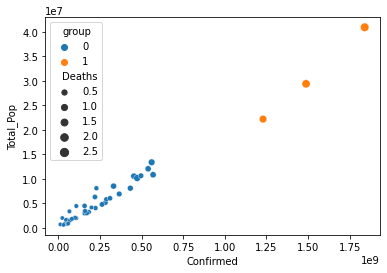

In [177]:
sns.scatterplot(x='Confirmed',y='Total_Pop', data=knn, hue='group', size='Deaths')

<AxesSubplot:xlabel='Long_', ylabel='Lat'>

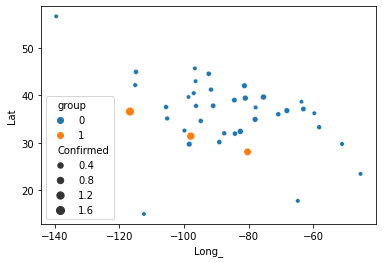

In [179]:
sns.scatterplot(x='Long_',y='Lat', data=knn, hue='group', size='Confirmed')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

In [125]:
test_scores = []
train_scores = []
rmse_val =[]
for i in range(1,20):

    knn = KNeighborsRegressor(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train)) # Score on Trained data
    test_scores.append(knn.score(X_test,y_test)) # Score on Test data
    pred=knn.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values

In [126]:
cf=pd.DataFrame([train_scores,test_scores, rmse_val]).transpose()
cf.rename(columns={0:'Train Score',1:'Test Score',2:'RMSE'}, inplace=True)
cf

,Train Score,Test Score,RMSE
0,1.000000,0.840051,139439.587921
1,0.909678,0.832850,142543.760975
2,0.838767,0.788562,160319.837172
3,0.792263,0.755911,172253.964789
4,0.759724,0.724459,183015.618633
5,0.727503,0.717722,185239.571398
6,0.718381,0.744570,176210.291769
7,0.726355,0.735937,179163.322960
8,0.711738,0.730726,180922.597524
9,0.700739,0.718665,184929.895415


In [127]:
import seaborn as sns

The score is  0.8328501916546648


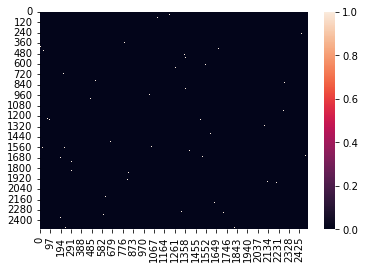

In [128]:
knn = KNeighborsRegressor(2)
knn.fit(X_train,y_train)

train_scores=(knn.score(X_train,y_train)) # Score on Trained data
test_scores=(knn.score(X_test,y_test)) # Score on Test data
pred=knn.predict(X_test) # make prediction on test set
sns.heatmap(knn.kneighbors_graph().toarray()) #draw a heatmap
print ('The score is ',test_scores)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


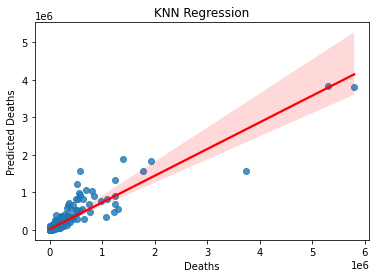

In [129]:
knn_plot=sns.regplot(y_test,pred,line_kws={"color": "red"})
knn_plot=plt.title('KNN Regression')
knn_plot=plt.xlabel('Deaths')
knn_plot=plt.ylabel('Predicted Deaths')
plt.show()

## Prediction by state

In [185]:
mean=df.groupby('Province/State').mean()
df2=df.groupby('Province/State').sum()
df2['Lat']=mean['Lat']
df2['Long_']=mean['Long_']
df2

,Confirmed,Deaths,Lat,Long_,Total_Pop
Province/State,,,,,
Alabama,283282881,5239645,NaN,NaN,5.174257e+06
Alaska,39060603,206366,NaN,NaN,8.766148e+05
Arizona,432838923,8211786,NaN,NaN,8.105036e+06
Arkansas,178058372,2868740,NaN,NaN,3.091831e+06
California,1839595402,27149306,NaN,NaN,4.090161e+07
Colorado,259968431,3343591,NaN,NaN,5.954143e+06
Connecticut,158088553,4314072,NaN,NaN,4.507430e+06
Delaware,51593423,849197,NaN,NaN,1.649913e+06
District of Columbia,25268132,578316,NaN,NaN,2.068635e+06


In [183]:


X=df2.drop('Deaths',axis=1)
y=df2.Deaths

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42) # random_state used for reproducibility
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(39, 4) (13, 4)
(39,) (13,)


In [184]:
test_scores = []
train_scores = []
rmse_val =[]
for i in range(1,20):

    knn = KNeighborsRegressor(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train)) # Score on Trained data
    test_scores.append(knn.score(X_test,y_test)) # Score on Test data
    pred=knn.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    
cf=pd.DataFrame([train_scores,test_scores, rmse_val]).transpose()
cf.rename(columns={0:'Train Score',1:'Test Score',2:'RMSE'}, inplace=True)
cf

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

The score is  0.7129701863025031


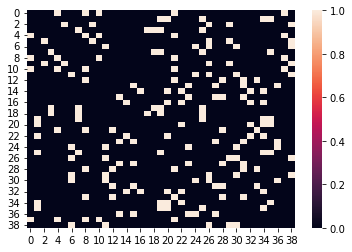

In [137]:
knn = KNeighborsRegressor(5)
knn.fit(X_train,y_train)

train_scores=(knn.score(X_train,y_train)) # Score on Trained data
test_scores=(knn.score(X_test,y_test)) # Score on Test data
pred=knn.predict(X_test) # make prediction on test set
sns.heatmap(knn.kneighbors_graph().toarray()) #draw a heatmap
print ('The score is ',test_scores)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


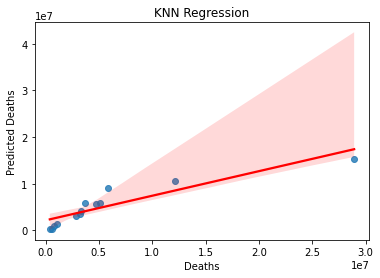

In [138]:
knn_plot=sns.regplot(y_test,pred,line_kws={"color": "red"})
knn_plot=plt.title('KNN Regression')
knn_plot=plt.xlabel('Deaths')
knn_plot=plt.ylabel('Predicted Deaths')
plt.show()

It's almost like there are two things happening here.  One for the data with large numbers of deaths and the other for small numbers